In [10]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [ ]:
start_time = dt.datetime(2020, 1, 1)
end = dt.datetime.now()


Estudar a volatilidade dos preços das ações, usando ATR(alcance médio verdadeiro)



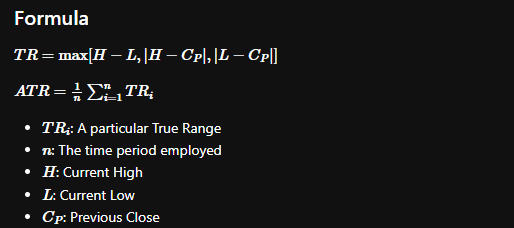

In [36]:
data = yf.download(tickers='NFLX', start=start_time, end=end)

[*********************100%***********************]  1 of 1 completed


In [53]:
def ATR(data):
  high_low = data["High"] - data['Low']
  high_cp = np.abs(data['High'] - data['Close'].shift())
  low_cp = np.abs(data['Low'] - data['Close'].shift())

  df = pd.concat([high_low, high_cp, low_cp], axis=1)

  true_range = np.max(df, axis=1)

  average_true_range = true_range.rolling(14).mean()

  return average_true_range


In [ ]:
atr = ATR(data)


Text(0, 0.5, 'Price')

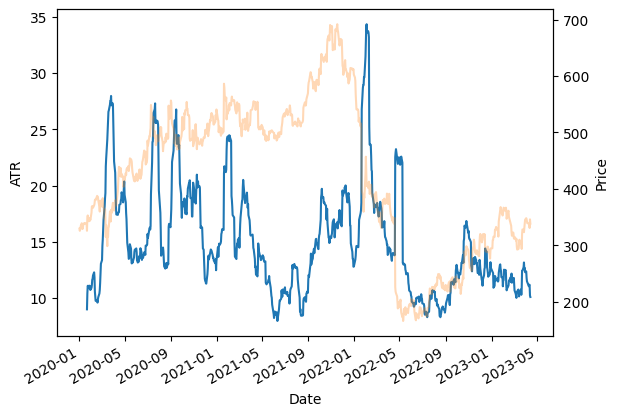

In [57]:
fig,ax = plt.subplots()
atr.plot(ax=ax)
ax2 = data['Close'].plot(ax=ax, secondary_y=True, alpha=.3)
ax.set_ylabel("ATR")
ax2.set_ylabel('Price')

#plot da volatilidade e o preço da ação no dia

Calcular o Shape Ratio (avalia a rentabilidade de um investimento em relação ao risco da aplicação financeira)

Formula:

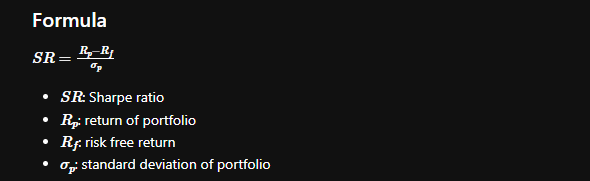

In [ ]:
#portfolio escolhido
tickers=['AAPL', 'MSFT', 'IBM']
data = yf.download(tickers=tickers, start=start_time, end=end)
data = data['Adj Close']


In [107]:
portfolio = [.40, .30, .30]

In [125]:
for x in data.index:
  data.loc[x,  'Retorno Diario'] = data.loc[x, tickers[0]] * portfolio[0] + data.loc[x, tickers[2]] * portfolio[2] +  data.loc[x, tickers[1]] * portfolio[1]

data

,AAPL,IBM,MSFT,Retorno Diario
Date,,,,
2020-01-02,73.449387,110.232498,155.761810,109.178047
2020-01-03,72.735313,109.353371,153.822296,108.046825
2020-01-06,73.314880,109.158020,154.219894,108.339326
2020-01-07,72.970085,109.231270,152.813736,107.801536
2020-01-08,74.143913,110.142967,155.247818,109.274801
...,...,...,...,...
2023-04-10,162.029999,131.029999,289.390015,190.938004
2023-04-11,160.800003,130.419998,282.829987,188.294997
2023-04-12,160.100006,128.539993,283.489990,187.648997


In [129]:
def std_dev(data):
    # Get number of observations
    n = len(data)
    # Calculate mean
    mean = sum(data) / n
    # Calculate deviations from the mean
    deviations = sum([(x - mean)**2 for x in data])
    # Calculate Variance & Standard Deviation
    variance = deviations / (n - 1)
    s = variance**(1/2)
    return s


def sharpe_ratio(data, risk_free_rate=0.0):
  # Calculate Average Daily Return
  mean_daily_return = sum(data) / len(data)
  # Calculate Standard Deviation
  s = std_dev(data)
  # Calculate Daily Sharpe Ratio
  daily_sharpe_ratio = (mean_daily_return - risk_free_rate) / s
  # Annualize Daily Sharpe Ratio
  sharpe_ratio = 252**(1/2) * daily_sharpe_ratio
  
  return sharpe_ratio


sharpe_ratio = sharpe_ratio(data['Retorno Diario'])
sharpe_ratio

164.9970033354542

Simulação de Monte Carlo